In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:

# Cargar el dataset
file_path_csv = "casas_dev_old.csv"  # Ajustar la ruta si es necesario
df = pd.read_csv(file_path_csv)


# Elegir un índice inicial aleatorio que permita tomar 20 filas consecutivas sin salir del dataset
start_idx = np.random.randint(0, len(df) - 20)

# Seleccionar 20 filas consecutivas desde ese índice
sample_data = df.iloc[start_idx : start_idx + 20]

print(f"### Muestra de 20 filas continuas desde el índice {start_idx} hasta {start_idx + 19}:")
print(sample_data.to_string(index=False))  # 🔹 Evita mostrar dtype y los índices de Pandas

# Analizar qué columnas podrían necesitar modificaciones
print("\n### Análisis de posibles problemas en las columnas:")

# Identificar columnas con valores faltantes
missing_values = sample_data.isnull().sum()
print("\nValores faltantes en las 20 filas seleccionadas:")
print(missing_values[missing_values > 0].to_string())
print("Suele haber valores NaN en age o rooms. Los valores Nan de age los reemplazaría por la media de la columna, \ny los de rooms lo haría acorde a el área de la propiedad, ya que la cantidad de cuartos es proporcional al área \nde la propiedad.")

# Ver si hay unidades mixtas en 'area_units'
if "area_units" in sample_data.columns:
    print("\nValores únicos en 'area_units':", sample_data["area_units"].unique())
    print("Si hay más de una unidad, se podría unificar en una sola, como por ejemplo pasar todo a metros cuadrados.")





### Muestra de 20 filas continuas desde el índice 149 hasta 168:
  area area_units  is_house  has_pool  age  price        lat        lon  rooms
 113.0         m2         1         0 17.0  196.0 -34.585988 -58.415250    3.0
1109.0       sqft         0         0  7.0  797.0  40.720584 -74.014395    3.0
  98.0         m2         1         0 17.0  277.0 -34.606802 -58.383858    3.0
  89.0         m2         1         1 14.0  186.0 -34.658388 -58.439792    2.0
 431.0       sqft         0         0 11.0  307.0  40.719466 -74.012345    1.0
  93.0         m2         1         0 17.0  167.0 -34.634054 -58.364631    NaN
  96.0         m2         0         1  NaN  282.0 -34.598110 -58.378274    3.0
 140.0         m2         1         0  8.0  267.0 -34.533096 -58.354929    4.0
 148.0         m2         0         0  3.0  263.0 -34.652242 -58.432778    4.0
  85.0         m2         1         0 13.0  164.0 -34.598654 -58.351991    2.0
 635.0       sqft         0         0  8.0  435.0  40.705679 -73.9

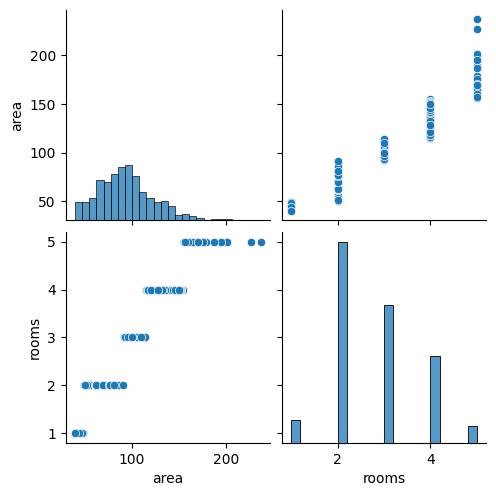

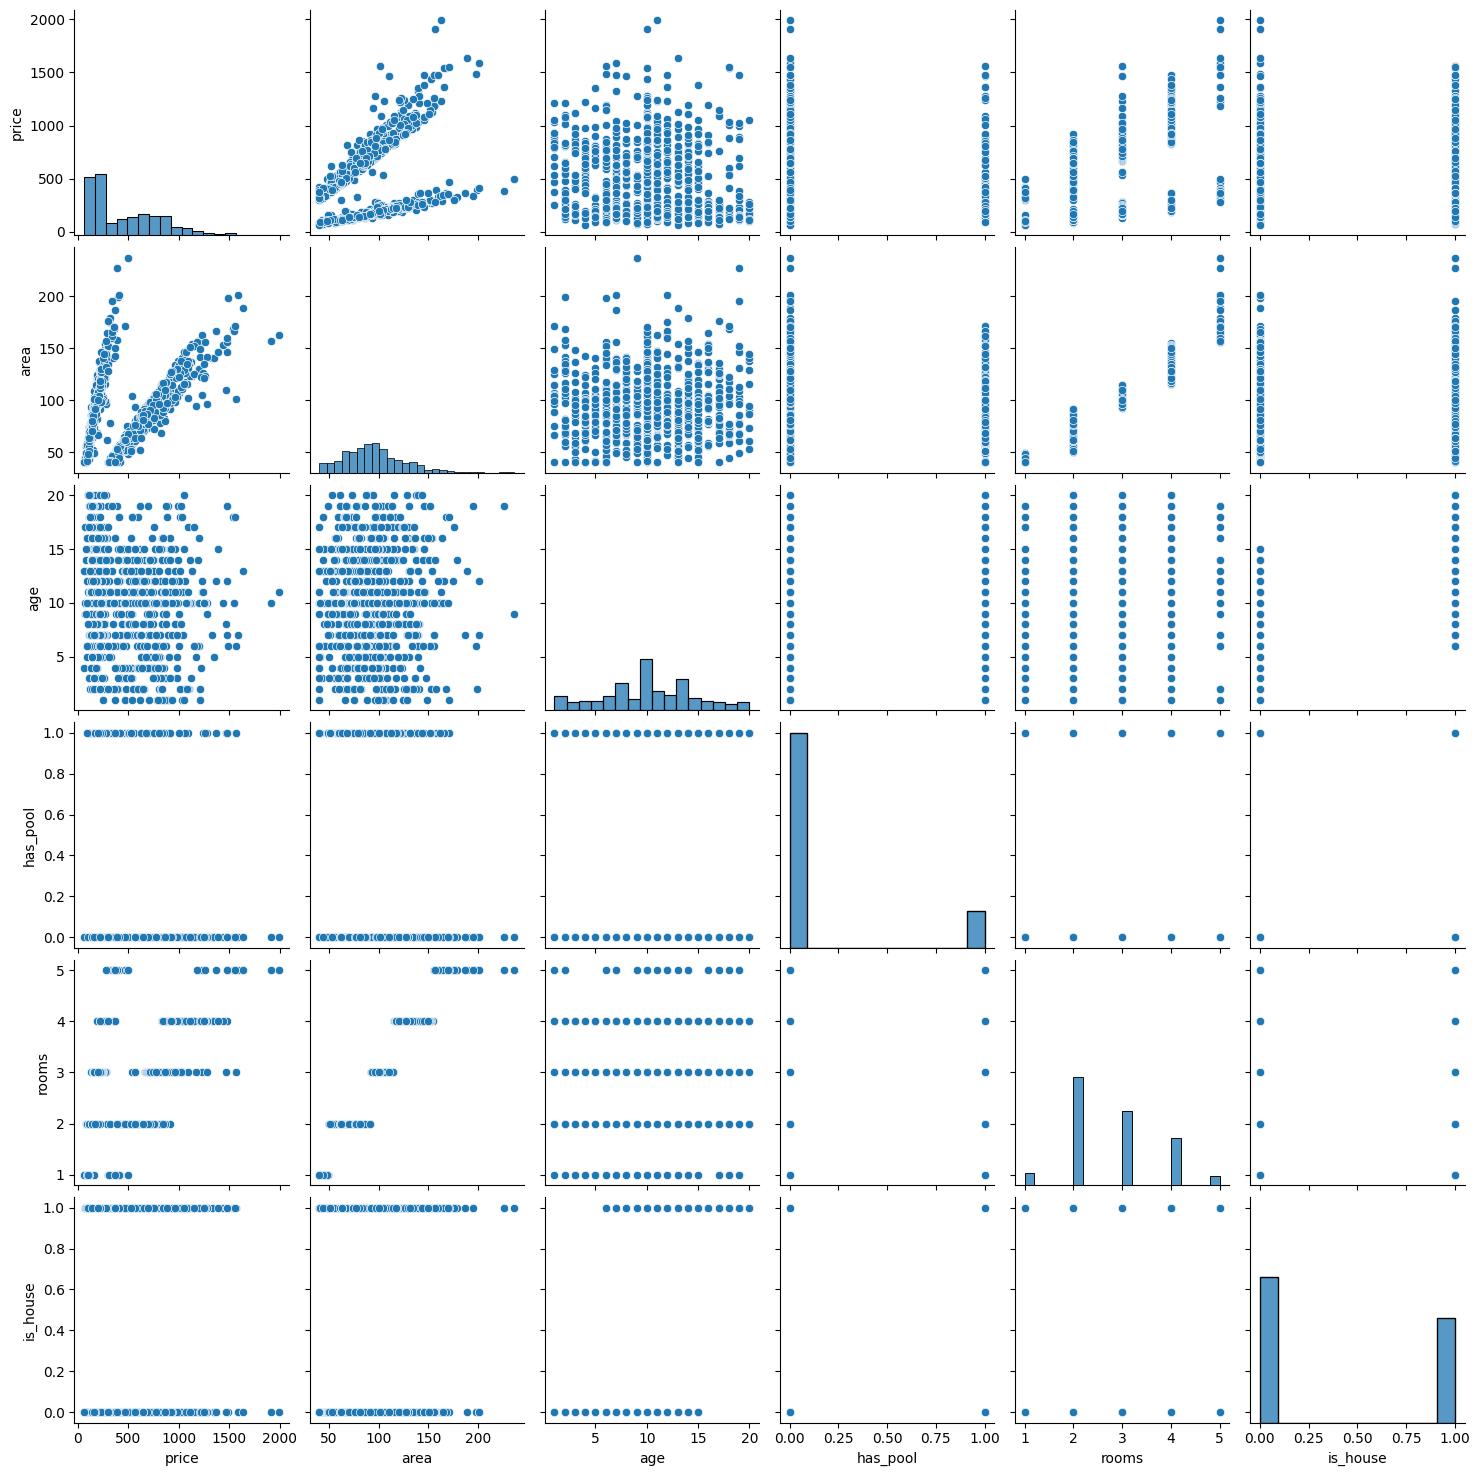

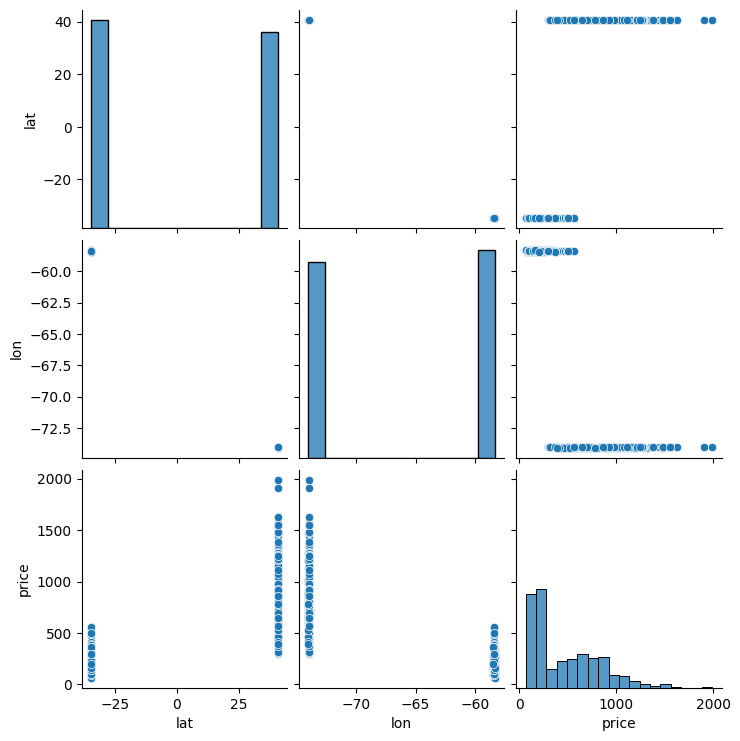

In [52]:
#Realice una serie de histogramas y diagramas de dispersión (scatterplots) para mostrar la relación entre las variables.
#Para esto, es útil el comando pairplot. ¿Qué conclusiones puede extraer a simple vista acerca de las relaciones entre las variables?
#Se permite la creación de gráficos adicionales que considere relevantes.


# Crear un pairplot con las variables numéricas

df = pd.read_csv("casas_dev.csv")

sns.pairplot(df[["area", "rooms",]])
sns.pairplot(df[[ "price", "area", "age", "has_pool","rooms", "is_house"]])

sns.pairplot(df[["lat", "lon", "price"]])




In [53]:
1.3


"""Divida el conjunto de desarrollo casas_dev.csv en un 80 % para entrenamiento (train)
y un 20 % para validación (validation). Estos conjuntos se utilizarán para entrenar y
validar los modelos que desarrollarán en las siguientes secciones. Se sugiere normalizar
los datos para lograr un mejora el condicionamiento numérico de los algortmos de
aprendizaje. Recuerde que si normaliza los datos, cuando haga una predicción deberá
invertir la normalización para volver a las escalas originales. Usar la libreria pandas con la funcion sample"""

df = pd.read_csv("casas_dev.csv")
# Dividir el dataset en train y validation
train = df.sample(frac=0.8, random_state=42)
validation = df.drop(train.index)


# crear un archivo csv para train y validation dentro de la carpeta del proyecto

train.to_csv("train.csv", index=False)
validation.to_csv("validation.csv", index=False)








In [54]:
#2)

#2.1)

"""implemente una clase de regresión lineal. El constructor deberá recibir X e y, y se
deberá incluir como métodos de entrenamiento de la clase: entrenamiento mediante
la pseudo-inversa y entrenamiento mediante descenso por gradiente. En ambos casos
se debe almacenar como atributo self.coef los coeficientes (pesos) resultantes de la
regresión.
NOTA: Asegúrese de que haya un método que permita imprimir los coeficientes con
los nombres de sus respectivas variables de forma prolija."
"""


import numpy as np

class LinearRegression:
    def __init__(self, X, y, l2=0.0, l1=0.0):
        X = np.array(X, dtype=np.float64)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        self.X = np.c_[np.ones(X.shape[0]), X]
        self.y = np.array(y, dtype=np.float64)
        self.l2 = l2  # Regularización L2
        self.l1 = l1  # Regularización L1
        self.coef = None
    
    def fit_pseudo_inverse(self):
        I = np.eye(self.X.shape[1])
        I[0, 0] = 0  # No regularizar el sesgo (intercepto)
        self.coef = np.linalg.pinv(self.X.T @ self.X + self.l2 * I) @ self.X.T @ self.y

    def soft_thresholding(self, x, l1):
        return np.sign(x) * np.maximum(np.abs(x) - l1, 0)
    
    def fit_gradient_descent(self, lr=0.01, epochs=10000):
        self.coef = np.zeros(self.X.shape[1])
        m = len(self.y)
        for _ in range(epochs):
            gradient = (2/m) * self.X.T @ (self.X @ self.coef - self.y) + self.l2 * self.coef
            gradient[0] -= self.l2 * self.coef[0]  # No regularizar intercepto
            
            self.coef -= lr * gradient
            self.coef[1:] = self.soft_thresholding(self.coef[1:], lr * self.l1)  # L1
            
            if np.isnan(self.coef).any() or np.isinf(self.coef).any():
                print("Error: coeficientes divergen. Reduce el learning rate.")
                return
    
    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.coef
    
    def print_coefs(self):
        print("Coeficientes:")
        for i, coef in enumerate(self.coef):
            print(f"Theta_{i}: {coef:.6f}")


#2.2)
#Implemente la función de pérdida utilizando el Error Cuadrático Medio (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)



Coeficientes:
Theta_0: 88.240545
Theta_1: 4.004262

Error cuadrático medio en el conjunto de test: 100509.43


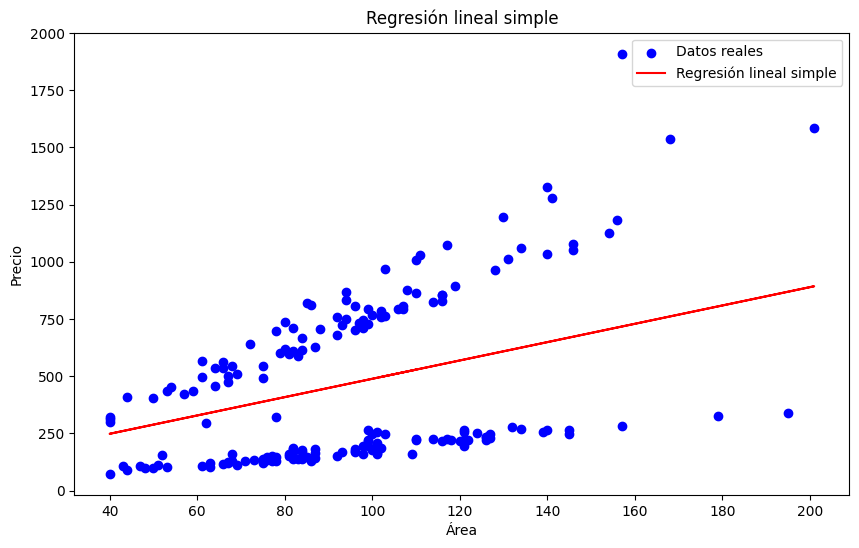

In [55]:
#3)

#3.1) Realice una regresión lineal simple (con una sola característica) para predecir el precio
# de una propiedad utilizando como variable explicativa solo el area.

# Cargar los datos de entrenamiento
train = pd.read_csv("train.csv")
X_train = train["area"]
y_train = train["price"]

# Crear y entrenar el modelo
model = LinearRegression(X_train, y_train)
model.fit_pseudo_inverse()

# Imprimir los coeficientes
model.print_coefs()

# Realizar predicciones en el conjunto de validacion

validation = pd.read_csv("validation.csv")
X_val = validation["area"]
y_val = validation["price"]

y_pred = model.predict(X_val)


# Calcular el error cuadrático medio en el conjunto de validacion
mse_simple = mse(y_val, y_pred)
print(f"\nError cuadrático medio en el conjunto de test: {mse_simple:.2f}")

#graficar la regresion lineal simple
plt.figure(figsize=(10, 6))
plt.scatter(X_val, y_val, color='blue', label='Datos reales')
plt.plot(X_val, y_pred, color='red', label='Regresión lineal simple')
plt.title("Regresión lineal simple")
plt.xlabel("Área")
plt.ylabel("Precio")
plt.legend()
plt.show()


In [68]:
#3.2)

#Desarrolle un modelo de regresión lineal que prediga el precio en función de las características que 
# considere relevantes. Utilizando el modelo entrenado, prediga el precio
# de vivienda_Amanda.csv.



# Cargar los datos de entrenamiento
train = pd.read_csv("train.csv")
X_train = train.drop(columns=["price"])
y_train = train["price"]


#normalizar todas las columnas de X_train

cols_to_normalize = ["area", "age", "lat", "lon", "rooms"]
X_train[cols_to_normalize] = (X_train[cols_to_normalize] - X_train[cols_to_normalize].mean()) / X_train[cols_to_normalize].std()

# Crear y entrenar el modelo
model = LinearRegression(X_train, y_train)
model.fit_pseudo_inverse()

# Imprimir los coeficientes
model.print_coefs()

print("voy a quedarme con las features mas representativas para el modelo")

X_train = train.drop(columns=["age", "price", "rooms" ])

# entreno un nuevo modelo con ese nuevo x_train
model_new = LinearRegression(X_train, y_train)
model_new.fit_pseudo_inverse()

model_new.print_coefs()

# Cargar los datos de Amanda
amanda = pd.read_csv("vivienda_Amanda.csv")
x_amanda = amanda.drop(columns=["rooms", "age"])
# Normalizar las columnas de Amanda




# Realizar predicciones para Amanda
y_amanda = model_new.predict(x_amanda)

print("\nPredicción de precio para Amanda:")
print(y_amanda)





Coeficientes:
Theta_0: 426.444167
Theta_1: 122.116028
Theta_2: 81.608097
Theta_3: 44.953543
Theta_4: -13.476538
Theta_5: 1734.756902
Theta_6: 1418.840217
Theta_7: 30.688038
voy a quedarme con las features mas representativas para el modelo
Coeficientes:
Theta_0: 10954.168432
Theta_1: 4.998427
Theta_2: 67.063616
Theta_3: 46.711787
Theta_4: 43.254774
Theta_5: 168.013618

Predicción de precio para Amanda:
[798.21938835]


In [64]:
#En el dataset, ¿cuál es el valor promedio por metro cuadrado de una casa?

# Calcular el precio promedio por metro cuadrado del dataset de casas_dev
df = pd.read_csv("casas_dev.csv")
#hacerlo nomas para las filas que tienen 1 en is_house

df = df[df["is_house"] == 1]
price_per_m2 = df["price"].mean() / df["area"].mean()

print(f"\nPrecio promedio por metro cuadrado: {price_per_m2:.2f}")



Precio promedio por metro cuadrado: 3.57


In [44]:
#Benito está evaluando la posibilidad de construir una pileta. ¿Cómo afectaría la 
# construcción de una pileta al precio de su propiedad? Explique cómo llegó a este resultado.

print("3.4)\nEl precio de contstruir una pileta va a afectar positivamente el valor de la casa de Benito. \nEsto lo vemos en el estudio de los coeficientes de la regresion lineal. En el punto 3.2, vemos que el coeficiente theta_3,\nque es el que representa la variación del precio de la casa por la construcción de la pileta, toma el valor 44.953543, \nsignificando que si la casa tiene pileta, su valor va a aumentar en esa cantidad.")


3.4)
El precio de contstruir una pileta va a afectar positivamente el valor de la casa de Benito. 
Esto lo vemos en el estudio de los coeficientes de la regresion lineal. En el punto 3.2, vemos que el coeficiente theta_3,
que es el que representa la variación del precio de la casa por la construcción de la pileta, toma el valor 44.953543, 
significando que si la casa tiene pileta, su valor va a aumentar en esa cantidad.


In [45]:
#4.1) Construya un conjunto de características derivadas a partir de las originales, que le pa-
#rezca relevante para predecir el precio de una propiedad, utilizando técnicas de Feature
#Engineering.

train = pd.read_csv("train.csv")
data = pd.read_csv("casas_dev.csv")
data["is_NY"] = ((data["lat"] > 0) & (data["lon"] < -65)).astype(int)


train["is_NY"] = ((train["lat"] > 0) & (train["lon"] < -65)).astype(int)
train["area_per_room"] = (train["area"] / train["rooms"]).round(0)


train.to_csv("train.csv", index=False)

data_NY = data[data["is_NY"] == 1]
data_BA = data[data["is_NY"] == 0]

#latitud maxima entre las propiedades de NY
lat_max_NY = data_NY['lat'].max()
#latitud minima entre las propiedades de NY
lat_min_NY = data_NY['lat'].min()
#longitud maxima entre las propiedades de NY
lon_max_NY = data_NY['lon'].max()
#longitud minima entre las propiedades de NY
lon_min_NY = data_NY['lon'].min()
#calcular el centro de NY
lat_center_NY = (lat_max_NY + lat_min_NY) / 2
lon_center_NY = (lon_max_NY + lon_min_NY) / 2


lat_max_BA = data_BA['lat'].max()
lat_min_BA = data_BA['lat'].min()
lon_max_BA = data_BA['lon'].max()
lon_min_BA = data_BA['lon'].min()

lat_center_BA = (lat_max_BA + lat_min_BA) / 2
lon_center_BA = (lon_max_BA + lon_min_BA) / 2

#crear una columna llamada distance_to_center. si la propiedad tiene un 1 en is_NY, calcularle la distanci al centro de NY
#si tiene un 0, calcularle la distancia al centro de BA

train["dist_to_center"] = np.where(train["is_NY"] == 1, np.sqrt((train["lat"] - lat_center_NY) ** 2 + (train["lon"] - lon_center_NY) ** 2), np.sqrt((train["lat"] - lat_center_BA) ** 2 + (train["lon"] - lon_center_BA) ** 2))



train.to_csv("train.csv", index=False)

validation = pd.read_csv("validation.csv")
validation["is_NY"] = ((validation["lat"] > 0) & (validation["lon"] < -65)).astype(int)
validation["area_per_room"] = (validation["area"] / validation["rooms"]).round(0)

validation.to_csv("validation.csv", index=False)

validation["dist_to_center"] = np.where(validation["is_NY"] == 1, np.sqrt((validation["lat"] - lat_center_NY) ** 2 + (validation["lon"] - lon_center_NY) ** 2), np.sqrt((validation["lat"] - lat_center_BA) ** 2 + (validation["lon"] - lon_center_BA) ** 2))
validation.to_csv("validation.csv", index=False)



Coeficientes:
Theta_0: -641.091817
Theta_1: 0.139470
Theta_2: 109.067789
Theta_3: 47.659777
Theta_4: -3.406318
Theta_5: 172.307041
Theta_6: 614.565684
Theta_7: 10.207078
Theta_8: -1532.434165

Error cuadrático medio en el conjunto de validación: 15486.39


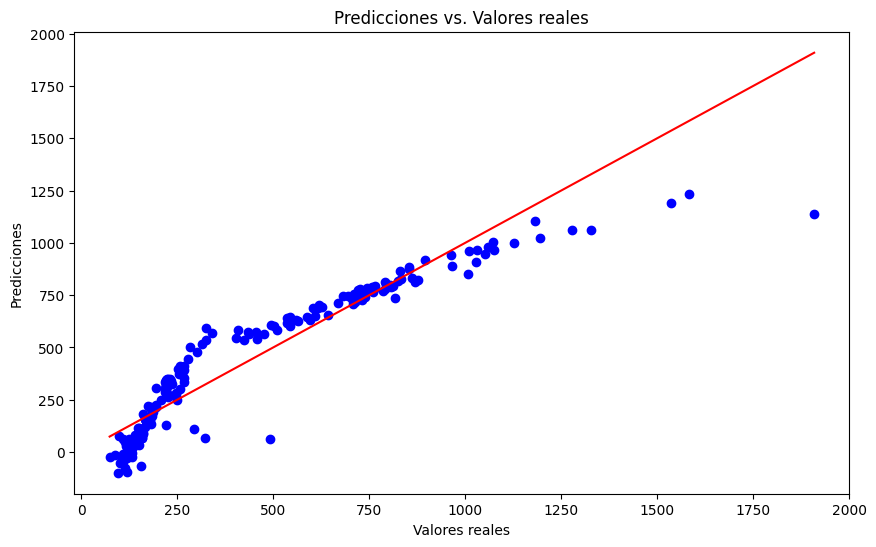

In [46]:
#realizar una regresion lineal
train = pd.read_csv("train.csv")
X_train = train.drop(columns=["lat","lon","price"])
y_train = train["price"]

#cols_to_normalize = ["area", "age", "rooms", "area_per_room", "dist_to_center"]

#X_train[cols_to_normalize] = (X_train[cols_to_normalize] - X_train[cols_to_normalize].mean()) / X_train[cols_to_normalize].std()


model = LinearRegression(X_train, y_train)
model.fit_pseudo_inverse()

model.print_coefs()

validation = pd.read_csv("validation.csv")
X_val = validation.drop(columns=["lat","lon","price"])

#X_val[cols_to_normalize] = (X_val[cols_to_normalize] - X_train[cols_to_normalize].mean()) / X_train[cols_to_normalize].std()


y_val = validation["price"]

y_pred = model.predict(X_val)

mse_complex = mse(y_val, y_pred)
print(f"\nError cuadrático medio en el conjunto de validación: {mse_complex:.2f}")


#graficar
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red')
plt.title("Predicciones vs. Valores reales")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()



Coeficientes:
Theta_0: 467.683333
Theta_1: 109985.072811
Theta_2: 54.017146
Theta_3: 14.699770
Theta_4: 193.814561
Theta_5: 5912.654333
Theta_6: 1374.400140
Theta_7: -353.986686
Theta_8: -4236.703097
Theta_9: -702115.584904
Theta_10: -4896.502436
Theta_11: -790359.854653
Theta_12: -11449.564297
Theta_13: -527.785552
Theta_14: 66299.674155
Theta_15: 1975374.232776
Theta_16: 2421356.960902
Theta_17: 107065.878187
Theta_18: 2304.395852
Theta_19: -416942.950608
Theta_20: -569769.538797
Theta_21: -3555055.473317
Theta_22: -412082.027327
Theta_23: 7788.529153
Theta_24: 1384248.948110
Theta_25: -1547857.537845
Theta_26: 1232468.707481
Theta_27: 688682.344788
Theta_28: -9232.035667
Theta_29: -2318721.522606
Theta_30: -647620.780439
Theta_31: 2612523.976978
Theta_32: -243653.909373
Theta_33: -9289.615408
Theta_34: 1260309.387869
Theta_35: 671265.609358
Theta_36: -858580.992539
Theta_37: -487893.599154
Theta_38: -485.317148
Theta_39: 1124446.779725
Theta_40: 1284375.308822
Theta_41: -2648304.385

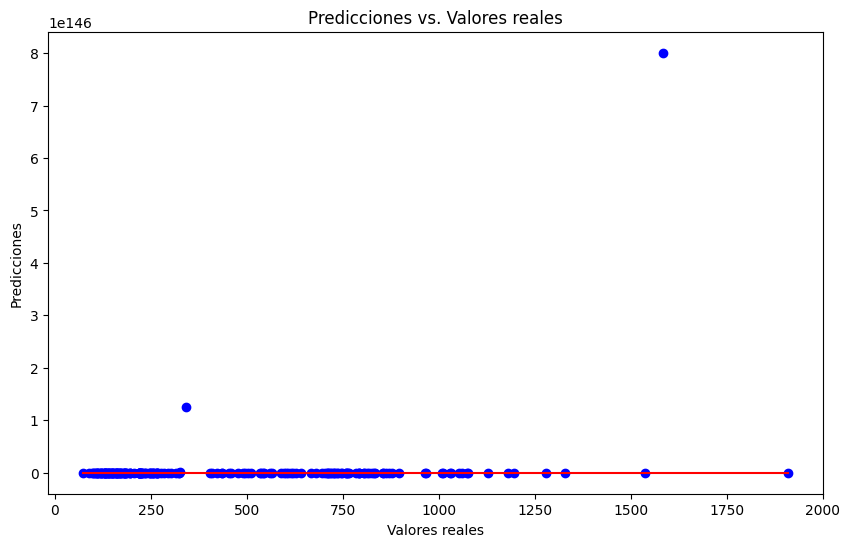

In [47]:
#Repita el proceso del ítem anterior generando 300 nuevos features como potencias de 
# los features anteriores (por ejemplo: [x21,x52,...,x12n])

train = pd.read_csv("train.csv")
validation = pd.read_csv("validation.csv")


colummns = ["area", "age", "rooms", "dist_to_center", "area_per_room"]


new_columns_train = {}
new_columns_validation = {}

for i in range(2, 62):
    for col in colummns:
        new_columns_train[f"{col}_{i}"] = train[col] ** i
        new_columns_validation[f"{col}_{i}"] = validation[col] ** i

new_features_train = pd.DataFrame(new_columns_train)
new_features_validation = pd.DataFrame(new_columns_validation)

train = pd.concat([train, new_features_train], axis=1)
validation = pd.concat([validation, new_features_validation], axis=1)

train.to_csv("train_300.csv", index=False)
validation.to_csv("validation_300.csv", index=False)


train = pd.read_csv("train_300.csv")
X_train = train.drop(columns=["price"])

#normalizar las columnas de X_train

cols_to_normalize = X_train.columns
X_train[cols_to_normalize] = (X_train[cols_to_normalize] - X_train[cols_to_normalize].mean()) / X_train[cols_to_normalize].std()

y_train = train["price"]

model = LinearRegression(X_train, y_train)
model.fit_pseudo_inverse()
model.print_coefs()

y_pred = model.predict(X_train)

mse_complex = mse(y_train, y_pred)

print(f"\nError cuadrático medio en el conjunto de train: {mse_complex:.2f}")


validation = pd.read_csv("validation_300.csv")
X_val = validation.drop(columns=["price"])

X_val[cols_to_normalize] = (X_val[cols_to_normalize] - X_train[cols_to_normalize].mean()) / X_train[cols_to_normalize].std()

y_val = validation["price"]

y_pred = model.predict(X_val)

mse_complex = mse(y_val, y_pred)

print(f"\nError cuadrático medio en el conjunto de validación: {mse_complex:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red')
plt.title("Predicciones vs. Valores reales")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()


4.4)

Del experimento de generar nuevas features esperaba encontrar información mas precisa para predecir el precio de las propiedades. Creía que se podía explorar mas en profundidad el impacto de la zona en la que estaban situadas las propiedades y que la feature is_NY podía aportar información relevante al modelo.

Por el otro lado, esperaba que el experimento de generar 300 features nuevas genere un sobreajuste del modelo de entrenamiento, causando overfitting y malos rersultados en los set de evaluación. Esperaba un error medio más alto en los sets de validación, lo cual ocurrió. 


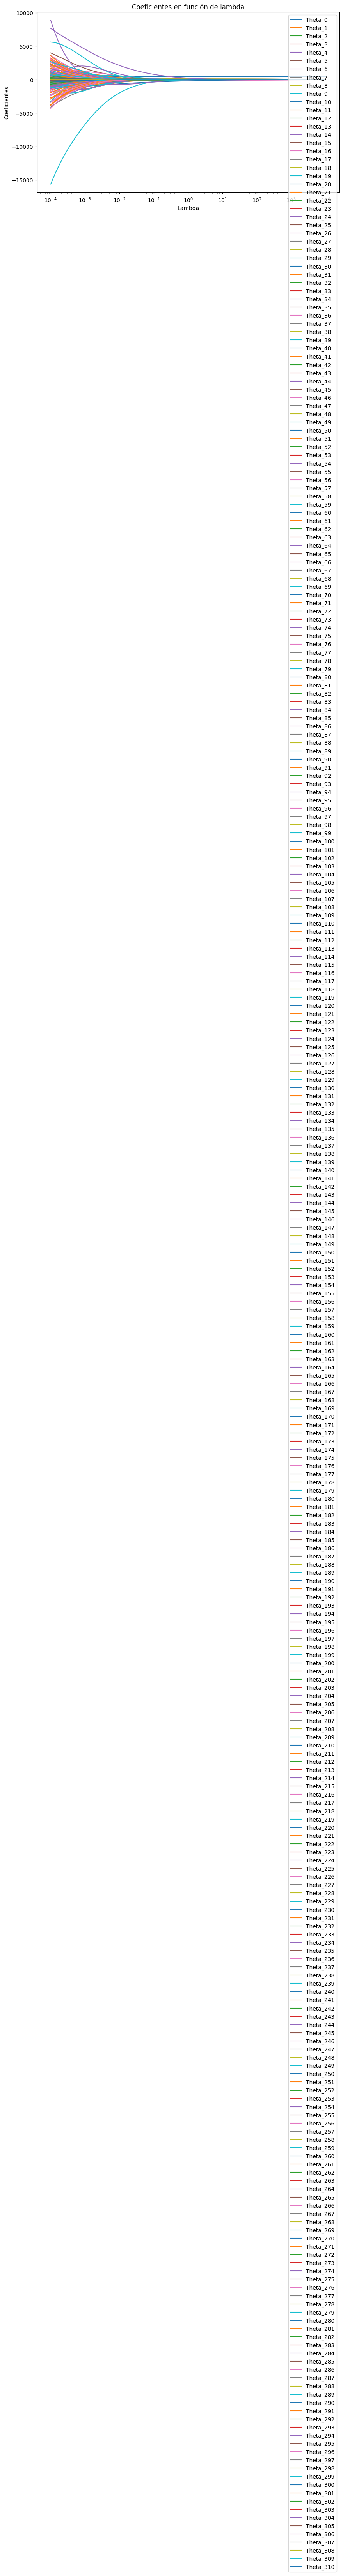

In [71]:
# Entrene un modelo de regresión lineal con regularización L2 (a veces llamado “Ridge
# regression”) utilizando como características las mismas que en el punto 4.2) y grafiqu
# el valor de los parametros w∗en función del coeficiente de penalización λ.

train = pd.read_csv("train_300.csv")
X_train = train.drop(columns=["price"])

cols_to_normalize = X_train.columns
X_train[cols_to_normalize] = (X_train[cols_to_normalize] - X_train[cols_to_normalize].mean()) / X_train[cols_to_normalize].std()

y_train = train["price"]

lambdas = np.logspace(-4, 4, 70)
coefs = []

for l2 in lambdas:
    model = LinearRegression(X_train, y_train, l2=l2)
    model.fit_pseudo_inverse()
    coefs.append(model.coef)    

coefs = np.array(coefs)

plt.figure(figsize=(10, 6))
for i in range(coefs.shape[1]):
    plt.plot(lambdas, coefs[:, i], label=f"Theta_{i}")  

plt.xscale("log")
plt.title("Coeficientes en función de lambda")
plt.xlabel("Lambda")
plt.ylabel("Coeficientes")
plt.legend()
plt.show()
        
